## Exploring GWAS Summary statistics

GWAS *summary statistics* are computed statistics like p-values and odds-ratios etc. that describe the strength of association between the genotype at a SNP and a trait of interest. This differs from *individual level* data, which are the complete set of genotypes and phenotypes for each individual. Summary statistics take up a lot less space, and also don't have the same privacy concerns that genotype data have.

Read in summary statistics from a genome-wide association study of 
Rheumatoid Arthritis. These data are from this study:
https://www.nature.com/articles/nature12873

In [3]:
gwas.tab <- read.table("../Data/RA_GWAS.txt", header=T)
head(gwas.tab)

SNP.ID,chrom,chrom.pos.hg19,genome.pos.hg19,allele1,allele2,p.val
<fct>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>
rs2799070,1,949925,949925,T,C,0.420
rs9329410,1,1039268,1039268,T,C,0.180
rs36030198,1,1043900,1043900,T,C,0.220
chr1:1163964,1,1163964,1163964,A,G,0.014
chr1:1171836,1,1171836,1171836,T,C,0.500
rs11260576,1,1210360,1210360,T,C,0.036


Note that these data have been thinned to reduce the size of the dataset for this class. Recent GWAS often include data from >8,000,000 SNPs. How many SNPs are in this data table?

In [5]:
nrow(gwas.tab)

[1] 100000

Let's take a look at the data. Make a histogram of the p-values.

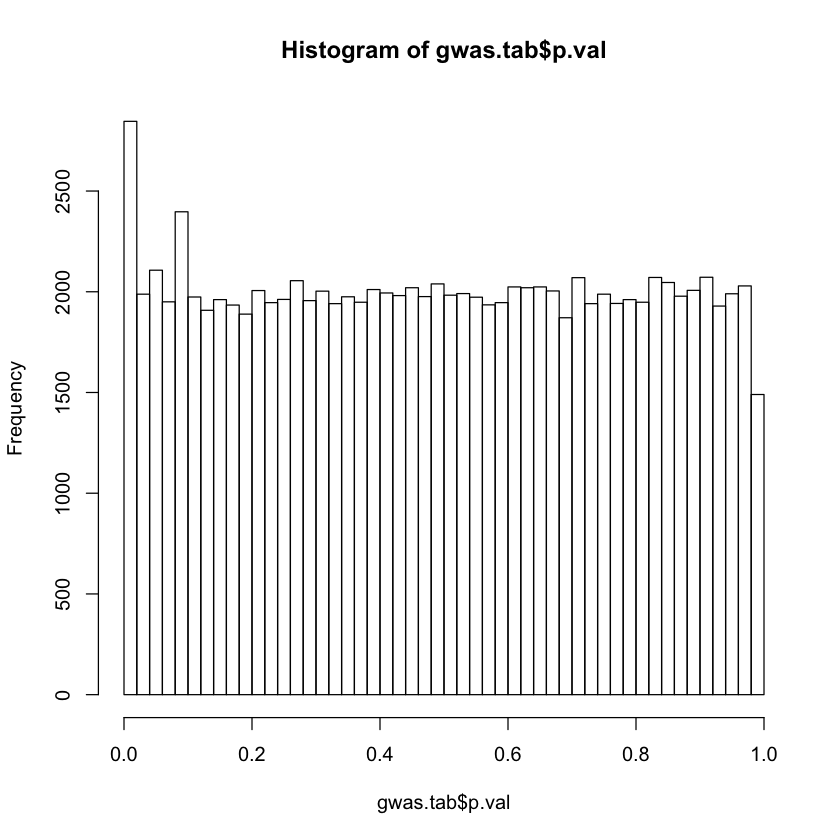

In [6]:
hist(gwas.tab$p.val, breaks=50)

Notice that the distribution looks faily uniform, but with an excess of low
p-values.

A quantile-quantile plot provides a better way to see how the distribution deviates from the null-expection of uniformity. In addition, if we use -log10 p-values, we can really see what is going on the low-p-value tail of the distribution.


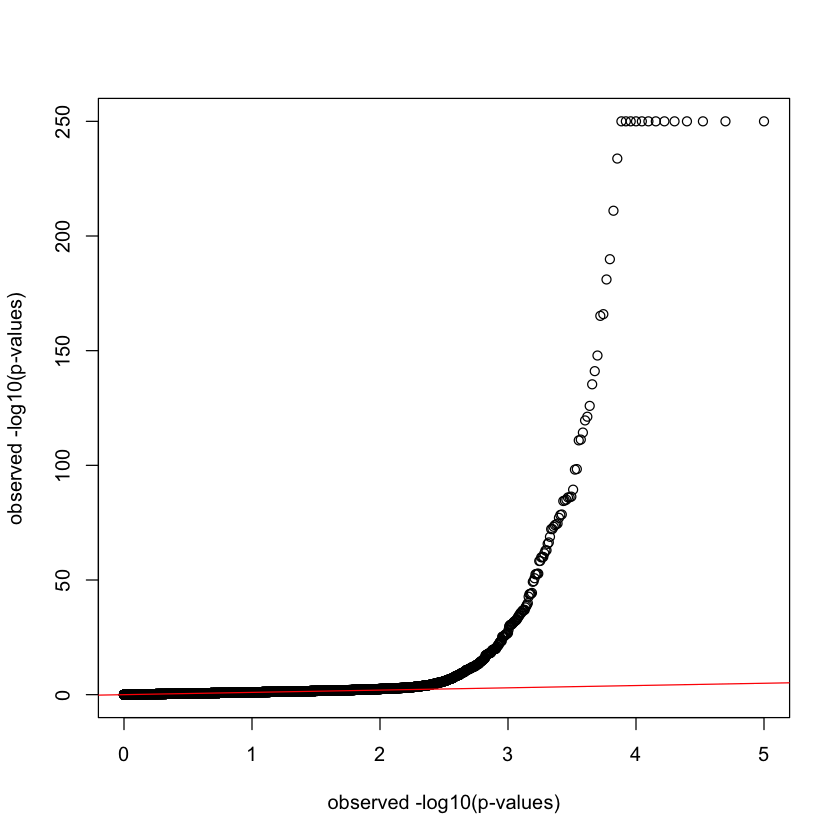

In [7]:
expect.p <- 1:nrow(gwas.tab) / nrow(gwas.tab)
obs.p <- gwas.tab$p.val
qqplot(-log10(expect.p), -log10(obs.p),
       xlab="observed -log10(p-values)",
       ylab="observed -log10(p-values)")

## add a line with a slope of 1, to show what the p-values would look
## like if the followed the null distribution
abline(a=0, b=1, col="red")

There are some very low p-values that make it difficult
to see the relationship between the two distributions,
so threshold p-values below 1e-20 to 1e-20.

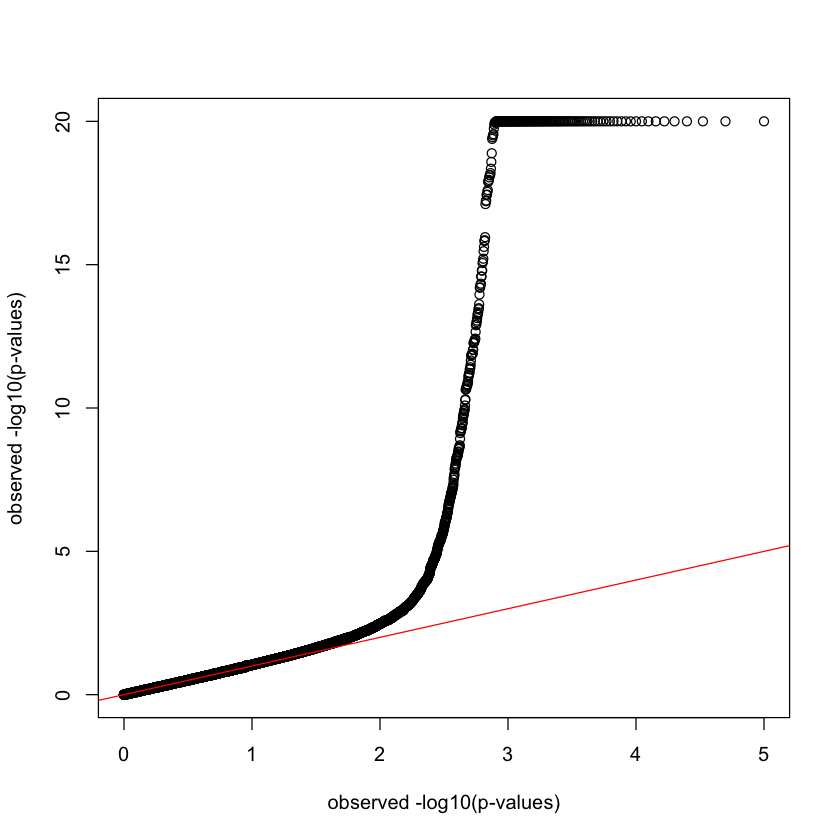

In [8]:
obs.p[obs.p < 1e-20] <- 1e-20
qqplot(-log10(expect.p), -log10(obs.p),
       xlab="observed -log10(p-values)",
       ylab="observed -log10(p-values)")
abline(a=0, b=1, col="red")

## Make a Manhattan plot

Let's make a manhattan plot, which shows the association signal
across the genome. 

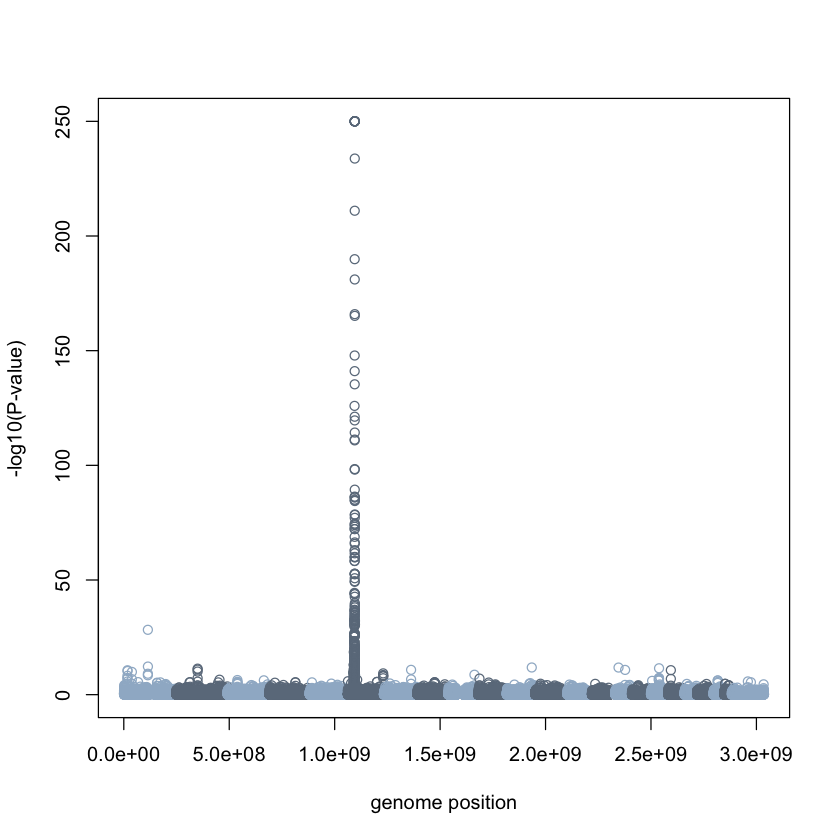

In [9]:
# Assign colors to each chromosome
chrom <- unique(gwas.tab$chrom)
chrom.color <- rep(c("slategray3", "slategray4"), (length(chrom)+1)/2)
gwas.tab["color"] <- rep("slategray3", nrow(gwas.tab))
for(i in seq(1,length(chrom))) {
  gwas.tab$color[gwas.tab$chrom == chrom[i]] <- chrom.color[i]
}

plot(gwas.tab$genome.pos.hg19, -log10(gwas.tab$p.val),
     col=gwas.tab$color, xlab="genome position", ylab="-log10(P-value)")

What is the region with the extremely low p-values?

In [10]:
gwas.tab[gwas.tab$p.val < 1e-200,]

,SNP.ID,chrom,chrom.pos.hg19,genome.pos.hg19,allele1,allele2,p.val,color
,<fct>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>,<chr>
37719,rs9268474,6,32357165,1094899125,T,C,1.0e-250,slategray4
37727,rs2076522,6,32371179,1094913139,G,C,1.0e-250,slategray4
37729,rs9268496,6,32375374,1094917334,A,G,1.0e-250,slategray4
37730,rs9268507,6,32377539,1094919499,A,G,1.0e-250,slategray4
37749,rs9269037,6,32437958,1094979918,T,C,1.0e-250,slategray4
37752,rs28752497,6,32568481,1095110441,A,T,1.0e-250,slategray4
37757,rs5004279,6,32582406,1095124366,G,C,9.6e-212,slategray4
37762,rs9271522,6,32589791,1095131751,T,C,1.0e-250,slategray4
37774,rs9275239,6,32660717,1095202677,A,G,1.0e-250,slategray4


Let's zoom in on this region.

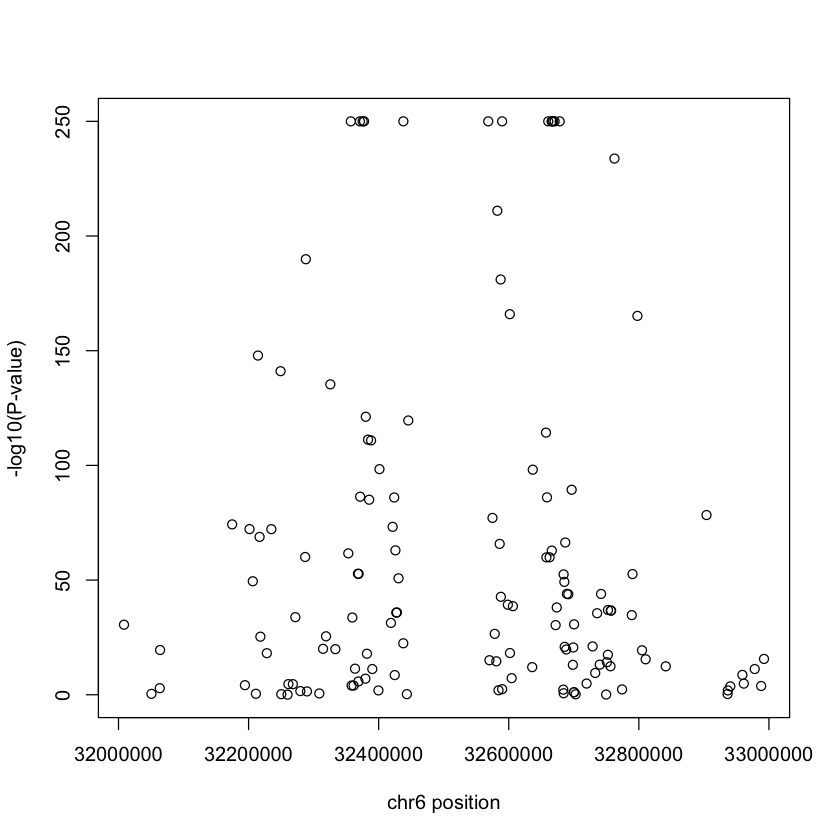

In [11]:
# Make a zoomed-in plot of the p-values just from chromosome 6 32-33MB

f <- which(gwas.tab$chrom=="6" &
           gwas.tab$chrom.pos.hg19 > 32e6 &
           gwas.tab$chrom.pos.hg19 < 33e6)

plot(gwas.tab$chrom.pos.hg19[f], -log10(gwas.tab$p.val[f]),
     xlab="chr6 position", ylab="-log10(P-value)")

*Q:* What region is this? Can look in UCSC genome browser

*A:* MHC Class II region

The MHC region has a super low p-value, which obscures other signals. Let's make the plot again, this time thresholding p-values to 1e-20.

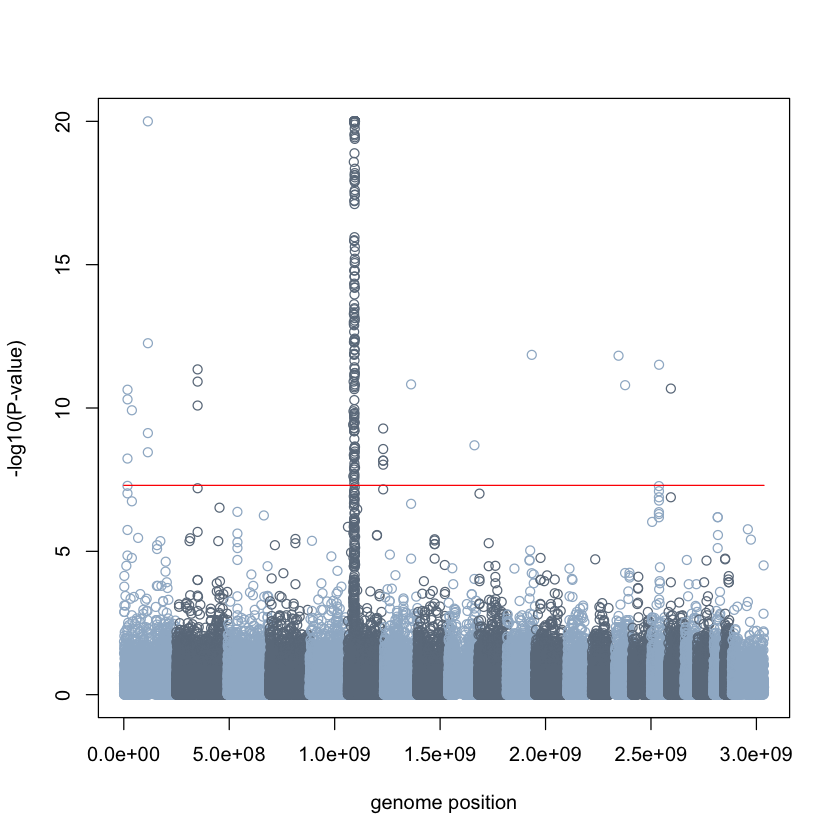

In [12]:
p.val <- gwas.tab$p.val
p.val[p.val < 1e-20] <- 1e-20

plot(gwas.tab$genome.pos.hg19, -log10(p.val),
     col=gwas.tab$color, xlab="genome position", ylab="-log10(P-value)",
     ylim=c(0, 20))

# also draw a line indicating the threshold for genome-wide significance (5e-8)
lines(x=c(0, max(gwas.tab$genome.pos.hg19)), y=rep(-log10(5e-8),2), col="red")